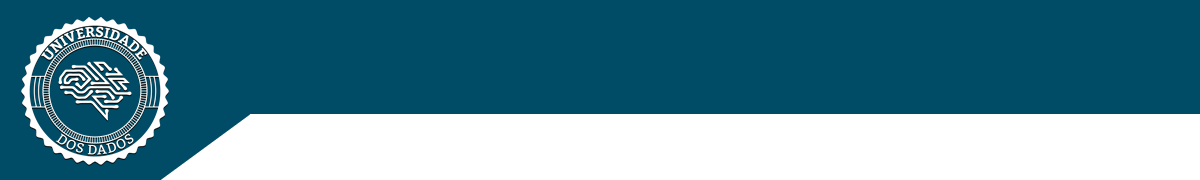
# Universidade dos Dados
GitHub: http://www.github.com/unidados/

Site de dicas: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Curta a nossa página no Facebook e fique por dentro das atualizações: <a href=http://facebook.com/universidadedosdados>Universidade dos Dados</a>

# Trabalhando com data e tempo no Pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
file="C:\\projetos\\ufo.csv"
ufo = pd.read_csv(file)
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [4]:
# Time é armazenado como string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

# Podemos utilizar do método str já ensinado para acessar as posições da data

In [238]:
# Porém essa abordagem não é 100% segura

ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [5]:
# Vamos converter a coluna Time para o formato Datetime

ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  
0 1930-06-01 22:00:00  
1 1930-06-30 20:00:00  
2 1931-02-15 14:00:00  
3 1931-06-01 13:00:00  
4 1933-04-18 19:00:00

In [6]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

# Com uma coluna do tipo Datetime, temos métodos muito melhores

In [7]:
# Selecionando a hora

ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [8]:
#Verificando o dia da semana da data

ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [9]:
#Verificando o dia do ano da data

ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

# Como funciona a conversão

In [11]:
#O resultado é um timestamp

ts = pd.to_datetime('31/1/1999')
ts

Timestamp('1999-01-31 00:00:00')

In [12]:
# Comparando uma série Datetime com Timestamp

ufo.loc[ufo.Time >= ts, :].head()

City Colors Reported Shape Reported State                Time
12956      Riverton             NaN       FIREBALL    WY 1999-01-31 19:30:00
12957  Lake Charles             NaN       TRIANGLE    LA 1999-01-31 22:02:00
12958     Flagstaff             NaN        CHEVRON    AZ 1999-02-01 00:00:00
12959          Lutz           GREEN          FLASH    FL 1999-02-01 18:00:00
12960       Molalla             NaN           DISK    OR 1999-02-01 18:00:00

In [16]:
#Encontrando a data mais alta

maxima = ufo.Time.max()
maxima

Timestamp('2000-12-31 23:59:00')

In [17]:
#Encontrando a menor data

minima = ufo.Time.min()
minima

Timestamp('1930-06-01 22:00:00')

In [19]:
# Podemos fazer operações matemáticas com as datas

td = maxima - minima
td

Timedelta('25781 days 01:59:00')

In [247]:
# O tipo Timedelta também tem atributos que podem ser acessados
# Aperte o TAB

td.

25781L

# Criando um gráfico de aparições de UFO ao longo dos anos

In [20]:
# Utilizando o matplotlib

%matplotlib inline

In [21]:
# Criando a coluna YEAR utilizando os métodos do tipo dt

ufo['Year'] = ufo.Time.dt.year

In [22]:
#Verificando a coluna

ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

In [24]:
#Contando os valores de aparições de anos

ufo.Year.value_counts().head(20)

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
1996     851
1994     406
1978     326
1975     312
1993     292
1976     281
1974     261
1977     258
1989     247
1992     245
1980     244
1990     237
1979     237
1988     232
1973     227
Name: Year, dtype: int64

In [26]:
#Observe que os valores não vem ordenados, o que invalída esse tipo de gráfico

ufo.Year.value_counts().sort_index().head(10)

1930    2
1931    2
1933    1
1934    1
1935    1
1936    2
1937    2
1939    3
1941    2
1942    3
Name: Year, dtype: int64

In [27]:
ufo.Year.value_counts().sort_index().tail(10)

1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, dtype: int64

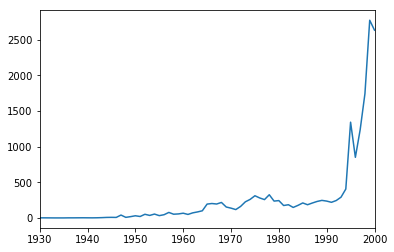

In [28]:
# Plotando o gráfico

ufo.Year.value_counts().sort_index().plot()